In [33]:
import pandas as pd
import plotly.express as px
import streamlit as st
import matplotlib.pyplot as plt
import datetime as dt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

data = 'C:/My Files/Python_Projects/Python Tutorials/Python Stuff/Interactive dashboard design using Streamlit/streamlit-sales-dashboard-main/supermarket_sales.xlsx'

## This sets the basic building block for my dashboard - 'title', layout etc...
st.set_page_config(
                    page_title = 'Sales Dashboard',  ## Title of the page/dashboard
                    page_icon = ':bar_chart:',       ## Icon for the dashboard/webpage
                    layout = 'wide'                  ## Layout of the webpage
)

## Caching the dataframe so that whenever we run the filter, streamlit does not re-read the entire excel/dataframe again. (Its lets our filter go through faster, cause streamlit
## no longer needs to re-read everything everytime we filter.)

## This is the data frame to be placed into my dashboard/webpage
@st.cache
def get_data_from_excel():
    df = pd.read_excel(data,                  
                       skiprows = 3,          ## Skip the rows in the excel sheet.
                       usecols = 'B:R',       ## The 'B:R' specifies the "B column" to "R Column"
                       sheet_name = 'Sales',  ## Specifies the desired sheetname from the excel to load
                       nrows = 1000           ## Specifies the number of rows you want to FULL DATAFRAME to show
                      ) 
    df['Hour'] = pd.to_datetime(df['Time'], format = '%H:%M:%S').dt.hour
    return df

df = get_data_from_excel()

## Inserting my dataframe into streamlit dashboard/webpage
#st.dataframe(df)

## Contructing my sidebar filters:
st.sidebar.header('Filter here: ')
city = st.sidebar.multiselect('Select the city: ',             # Title of the multiselect filter
                              options = df['City'].unique(),   # Options for my multiselect filter
                              default = df['City'].unique()    # Setting the default values of my multiselect filter
                             )

branch = st.sidebar.multiselect('Select the branch: ',             # Title of the multiselect filter
                              options = df['Branch'].unique(),   # Options for my multiselect filter
                              default = df['Branch'].unique()    # Setting the default values of my multiselect filter
                             )

gender = st.sidebar.multiselect('Select the gender: ',             # Title of the multiselect filter
                              options = df['Gender'].unique(),   # Options for my multiselect filter
                              default = df['Gender'].unique()    # Setting the default values of my multiselect filter
                             )

customer_type = st.sidebar.multiselect('Select the customer_type: ',             # Title of the multiselect filter
                                       options = df['Customer_type'].unique(),   # Options for my multiselect filter
                                       default = df['Customer_type'].unique()    # Setting the default values of my multiselect filter
                                      )

# Using the query() method from pandas, i assign my variables to my desired columns to enable the filters to work
df_filters = df.query(
    'City == @city & Branch == @branch & Gender == @gender & Customer_type == @customer_type '
)

df_filters['Hour'] = pd.to_datetime(df_filters['Time'], format = '%H:%M:%S').dt.hour


# Inserting my new data frame with embedded filter functions into my dashboard
# st.dataframe(df_filters)

### Building my MAINPAGE (Instead of showing the dataframe, I want the mainpage to show KPIs/Indicators instead)
st.title('Sales Dashboard')
st.markdown('---')

#Using pandas to build and show the Total KPIs
total_sales = round(df_filters['Total'].sum(),2)
average_rating = round(df_filters['Rating'].mean(),1) ## The 'round' and 1 after means rounding up the final value to 1 decimal place!!
star_rating = ':star:' * int(average_rating)
average_sale_by_transaction = round(df_filters['Total'].mean(),2)

left, middle, right = st.columns(3) ## st.columns allows streamlit to allocate space and insert our necessary KPIs together
with left:    # within the the column 'left' (defined in the previous line by st.columns)
    st.subheader(":bar_chart: Total Sales: ")  # Title of the subheader
    st.subheader(f'USD {total_sales}')
with middle:
    st.subheader("Average Rating: ")  # Title of the subheader
    st.subheader(f'{average_rating} {star_rating}')
with right:
    st.subheader("Average Sales: ")  # Title of the subheader
    st.subheader(f'USD {average_sale_by_transaction}')    

st.markdown('---') # Giving a long line to make it look neater using the markdown() method!



### Plotting the dang graphs but i use matplotlib instead of plotly because i can

df3 = df_filters.pivot_table(index = 'Product line', values = 'Total', aggfunc = sum).reset_index() ## Sorting into a new dataframe that shows the product group with the sum of sales for each product group

x = df3['Product line']
y = df3['Total']


plt.figure(figsize = (5,5))


barchart = plt.barh(x,y) ## .barh() plots out a HORIZONTAL BAR CHART
plt.title('Sales by Product Group USD')
plt.ylabel('Product Group')
plt.xlabel('Sales by Product Group (USD)')
plt.xticks(size = 12)
plt.yticks(size = 15)


plt.show()

left2, right2 = st.columns(2)

with left2:
	st.pyplot()

## BarChart for Sales VS Time:

Total_Sales_By_Hour = df_filters.pivot_table(index = ['Hour'], values = ['Total'], aggfunc = sum).reset_index()
Total_Sales_By_Hour.sort_values('Total', ascending = False)

plt.figure(figsize = (5,5))

x = Total_Sales_By_Hour['Hour']
y = Total_Sales_By_Hour['Total']

plt.bar(x,y)
plt.title ('Sales against Time (USD)')
plt.xticks(x)
plt.xlabel('Hours')
plt.ylabel("Sales (USD)")

plt.show()

with right2:
	st.pyplot()
	st.markdown('---')

## I can add in another plot in streamlit as long as i specify 'st.pyploy()' So streamlit will show 2 graphs
#barchart2 = plt.barh(x,y) ## .barh() plots out a HORIZONTAL BAR CHART
#plt.title('2nd Graph', fontsize = 30)
#plt.ylabel('Product Group', fontsize = 20)
#plt.xlabel('Sales by Product Group (USD)', fontsize = 20)
#plt.xticks(size = 15)


#st.pyplot()

st.markdown('---')

st.dataframe(df_filters)


## We are done with the dashboard, now we begin styling the dashboard!!!
# STYLING THE WEB APP (Will be using some custom CSS code)
# ---- HIDE STREAMLIT STYLE ----

# ---- HIDE STREAMLIT STYLE ----
hide_st_style = """
            <style>
            #MainMenu {visibility: hidden;}
            footer {visibility: hidden;}
            header {visibility: hidden;}
            </style>
            """
st.markdown(hide_st_style, unsafe_allow_html=True)

# Then create a '.streamlit' folder and create a txtfile called 'config.toml' and paste the color and style codes from the tutorial inside. This will change the overall colors of the webpage.





InternalHashError: module '__main__' has no attribute '__file__'

While caching the body of `get_data_from_excel()`, Streamlit encountered an
object of type `builtins.function`, which it does not know how to hash.

**In this specific case, it's very likely you found a Streamlit bug so please
[file a bug report here.]
(https://github.com/streamlit/streamlit/issues/new/choose)**

In the meantime, you can try bypassing this error by registering a custom
hash function via the `hash_funcs` keyword in @st.cache(). For example:

```
@st.cache(hash_funcs={builtins.function: my_hash_func})
def my_func(...):
    ...
```

If you don't know where the object of type `builtins.function` is coming
from, try looking at the hash chain below for an object that you do recognize,
then pass that to `hash_funcs` instead:

```
Object of type builtins.function: <function get_data_from_excel at 0x000002D65C7BD3A0>
```

Please see the `hash_funcs` [documentation](https://docs.streamlit.io/library/advanced-features/caching#the-hash_funcs-parameter)
for more details.
            

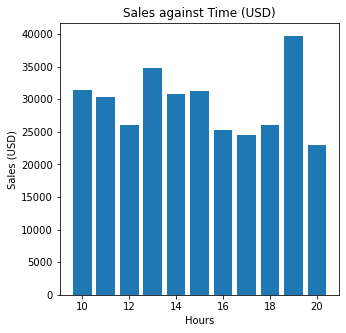

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

<Figure size 432x288 with 0 Axes>

In [29]:
# df3 = df_filters.pivot_table(index = 'Product line', values = 'Total', aggfunc = sum).reset_index()
df_filters['Hour'] = pd.to_datetime(df['Time'], format = '%H:%M:%S').dt.hour

Total_Sales_By_Hour = df_filters.pivot_table(index = ['Hour'], values = ['Total'], aggfunc = sum).reset_index()
Total_Sales_By_Hour.sort_values('Total', ascending = False)

plt.figure(figsize = (5,5))

x = Total_Sales_By_Hour['Hour']
y = Total_Sales_By_Hour['Total']

plt.bar(x,y)
plt.title ('Sales against Time (USD)')
plt.xlabel('Hours')
plt.ylabel("Sales (USD)")

plt.show()

st.pyplot()

In [26]:
df_filters

,Invoice ID,Branch,City,Customer_type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2021-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2021-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2021-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2021-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2021-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2021-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,13
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2021-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,17
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2021-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2021-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1,15


In [28]:
df_filters

Total_Sales_By_Hour = df_filters.pivot_table(index = ['Hour'], values = ['Total'], aggfunc = sum).reset_index()
Total_Sales_By_Hour.sort_values('Total', ascending = False)

,Hour,Total
9,19,39699.5130
3,13,34723.2270
0,10,31421.4810
5,15,31179.5085
4,14,30828.3990
1,11,30377.3295
2,12,26065.8825
8,18,26030.3400
6,16,25226.3235
7,17,24445.2180
